#  Exploratory data analysis (EDA)

### Reference:

https://www.kaggle.com/tu05next/eda-on-haberman-dataset

## Haberman dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load Haberman csv into a pandas dataFrame.
haberman_data = pd.read_csv("haberman.csv")

In [3]:
# how many data-points and features
print (haberman_data.shape)
# column names in our dataset
print (haberman_data.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


Relevant Information about the Data set (https://www.kaggle.com/gilsousa/habermans-survival-data-set): 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

- Number of Instances: 306
- Number of Attributes: 4 (including the class attribute)
- Attribute Information:

    1-Age of patient at time of operation (numerical) <br/>
    2-Patient's year of operation (year - 1900, numerical)<br/>
    3-Number of positive axillary nodes detected (numerical)<br/>
    4-Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [4]:
# Replacing status category 1 with Survived and 2 with status category 2 with dead to make the dataset more readable  
haberman_data['status'] = haberman_data['status'].map({1:'survived', 2:'dead'})
haberman_data.tail()

,age,year,nodes,status
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,dead
305,83,58,2,dead


In [5]:
#How many data points for each class are present? 

haberman_data["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#Haberman is an im-balanced dataset as the number of data points for the two classes of suvival status 
#are distributed in the ratio of 3:1.

survived    225
dead         81
Name: status, dtype: int64

Observation: We have 225 datapoints with status as survived and 81 datapoints with status as dead  
             Hence, the data is highly imbalance in nature as the category is distributed in the ratio of approx 3:1.

In [6]:
# patients who survived more than 5 years
pat_survived = haberman_data[haberman_data['status']=='survived']
pat_survived.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


Observation on the survived patents:
- Patients age vary from 30 to 77 and avg age being 52.
- Average nodes vary from 0 to 46(probably an outlier) as the mean being 2.79 and std deviation being 5.87.
- 75% of patients have noeds less than 3.  

In [7]:
# patients who survived less than 5 years
pat_died = haberman_data[haberman_data['status']=='dead']
pat_died.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


Observation on the dead patents:
- Patients age vary from 34 to 83 and avg age being 53.
- Average nodes vary from 0 to 52 as the mean being 7.45 and std deviation being 9.18.
- 75% of patients have noeds less than 11. 

Observation on survived and dead patents:
- Average nodes in dead patients are higher compared to average nodes in patients those survived.


#  2-D Scatter Plot

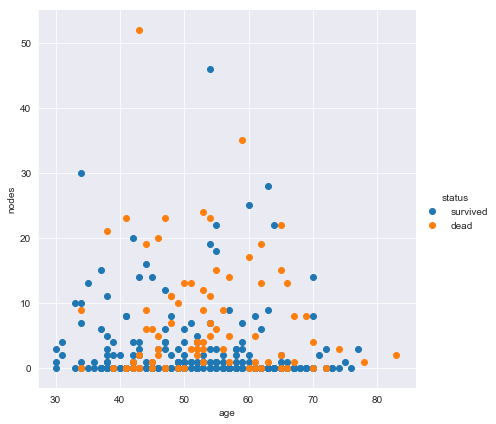

In [8]:
#2-D scatter plot:


sns.set_style("darkgrid")
sns.FacetGrid(haberman_data,hue="status",height=6).map(plt.scatter,"age","nodes").add_legend()
plt.show()


Observation: As the number of positive axillary nodes detected increases, there are more people who die within 5 years than people who survived. On the opposite we notice that people who survived generally had few axilary detected nodes.


# Pair-plot

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


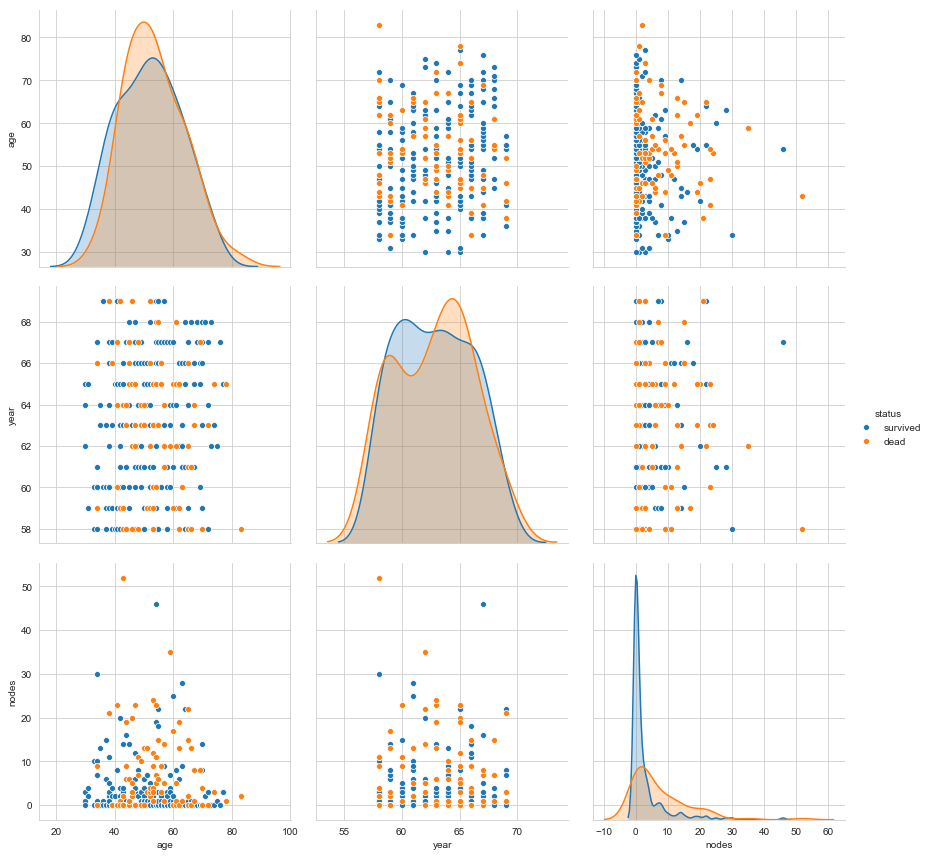

In [9]:
# For more 2D-Plot insights let's draw our pair plot
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman_data,hue = "status",height = 4)
plt.show()

**Observations**
1. The number of detected axilary nodes are the most useful features to identify our target variable value.
2. Ther's a lot of overlap between the two classes which can not be simply separated.

# Histogram, PDF, CDF

#### 1 - Univariate analysis on Two separated dataframes 

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


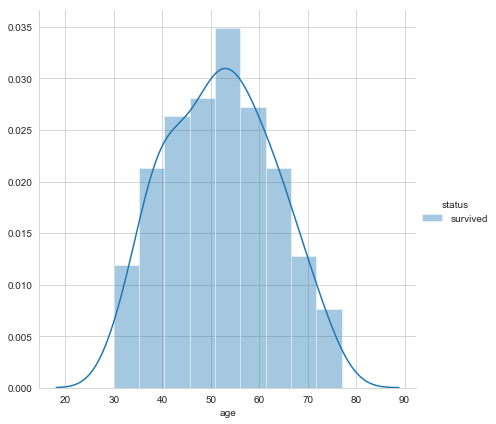

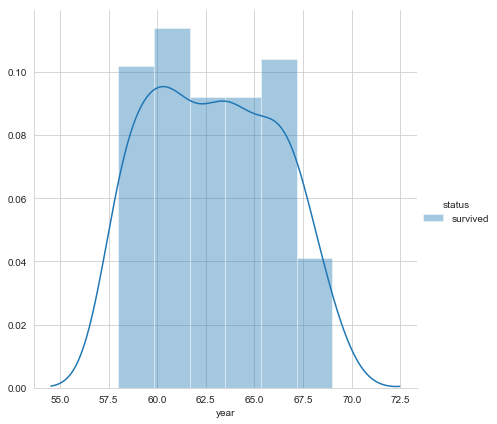

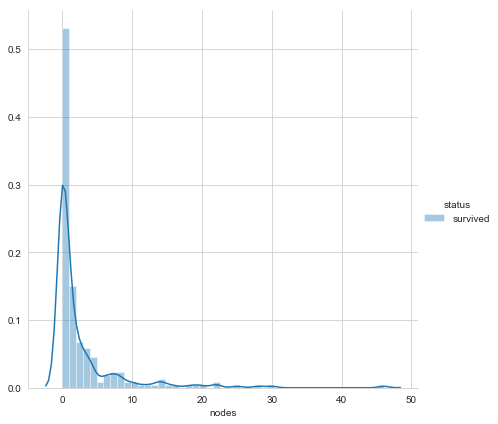

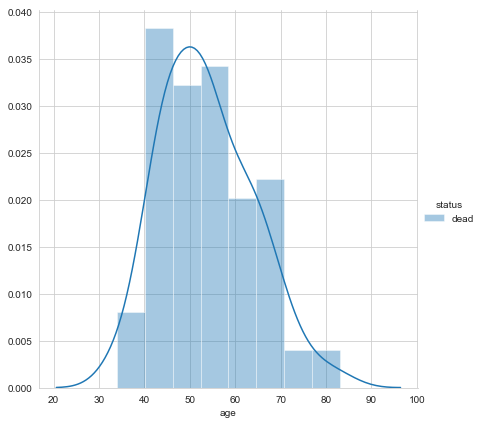

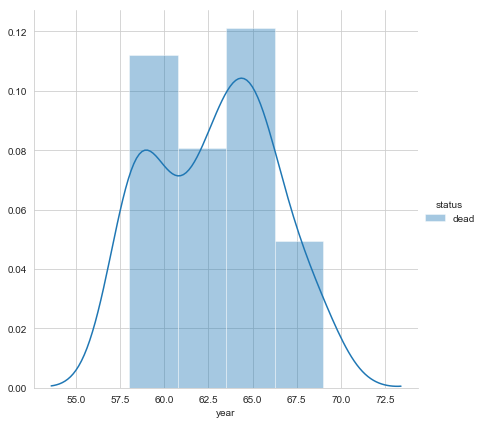

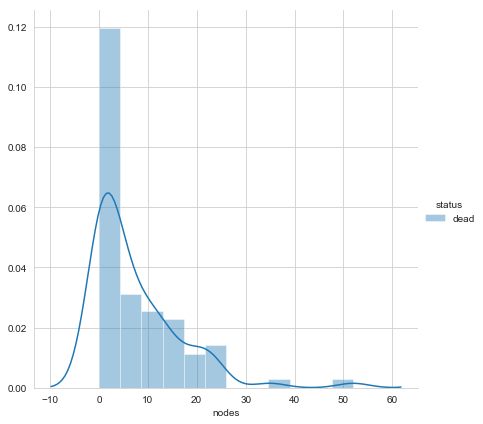

In [10]:
for dataF in [pat_survived,pat_died]:
    for column in haberman_data.columns[:-1]:
        sns.FacetGrid(dataF,hue="status",height = 6).map(sns.distplot,column).add_legend()
        plt.show()

#### 2 - Univariate analysis on The whole data set 

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


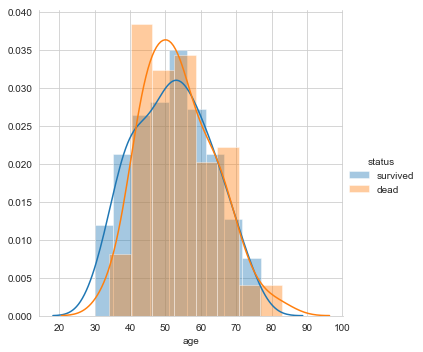

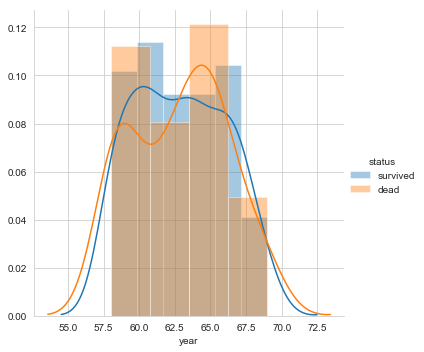

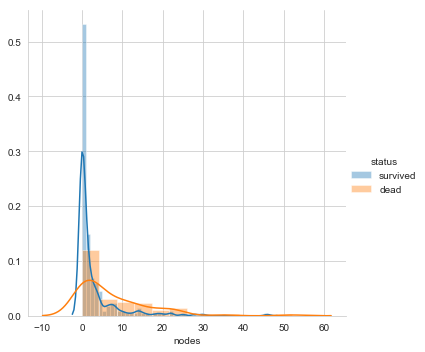

In [11]:
for column in haberman_data.columns[:-1]:
    sns.FacetGrid(haberman_data,hue="status",height=5).map(sns.distplot,column).add_legend()
    plt.show()

1. Univariate PDFs/CDFs on the whole Data set

PDF and CDF of  age  variable.
PDF:  [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]


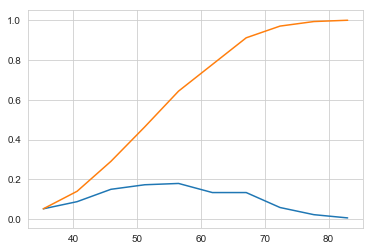

PDF and CDF of  year  variable.
PDF:  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]


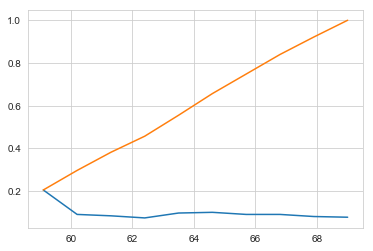

PDF and CDF of  nodes  variable.
PDF:  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


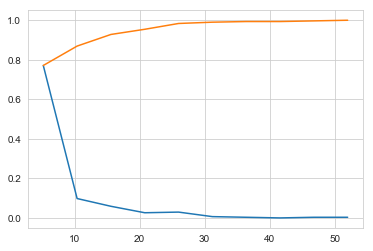

In [12]:
for column in haberman_data.columns[:-1]:
    counts, bins_edges = np.histogram(haberman_data[column],bins=10,density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    print("PDF and CDF of ",column," variable.")
    print("PDF: ",pdf)
    plt.plot(bins_edges[1:],pdf)
    plt.plot(bins_edges[1:],cdf)
    plt.show()

2. Univariate PDFs/CDFs on the yes/no datasets(split in two data sets)

PDF and CDF of  age  variable In DataFrame: survived _DF
PDF:  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bins_Edges:  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


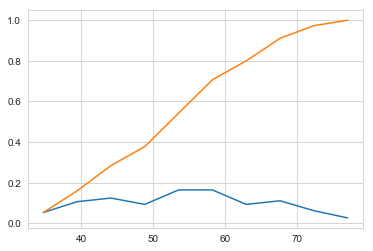

PDF and CDF of  year  variable In DataFrame: survived _DF
PDF:  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bins_Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


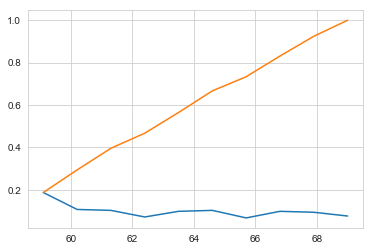

PDF and CDF of  nodes  variable In DataFrame: survived _DF
PDF:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bins_Edges:  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


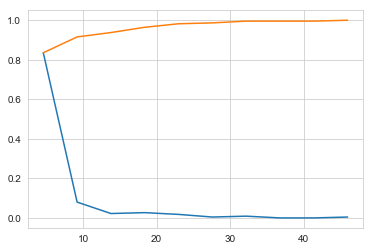

PDF and CDF of  age  variable In DataFrame: dead _DF
PDF:  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bins_Edges:  [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


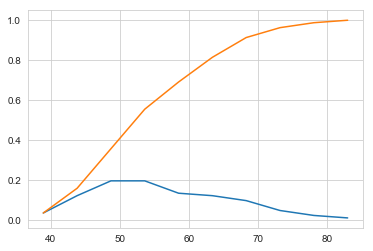

PDF and CDF of  year  variable In DataFrame: dead _DF
PDF:  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Bins_Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


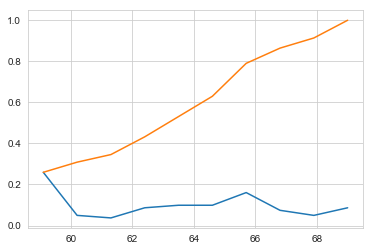

PDF and CDF of  nodes  variable In DataFrame: dead _DF
PDF:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bins_Edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


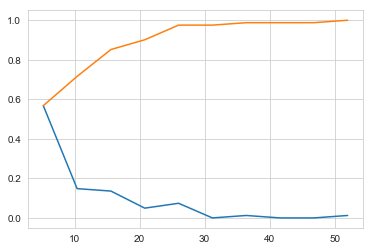

In [13]:
for dataF in [pat_survived,pat_died]:
    for column in haberman_data.columns[:-1]:
        counts, bins_edges = np.histogram(dataF[column],bins=10,density=True)
        pdf = counts/sum(counts)
        cdf = np.cumsum(pdf)
        print("PDF and CDF of ",column," variable In DataFrame:",dataF.status.iloc[0],"_DF")
        print("PDF: ",pdf)
        print("Bins_Edges: ",bins_edges)
        plt.plot(bins_edges[1:],pdf)
        plt.plot(bins_edges[1:],cdf)
        plt.show()

#### Statistics on "age" and "axil_nodes_det" variables (mean, std, percentiles, median, IDR, MAD, Quantiles)

In [14]:
for column in ["age","nodes"]:
    print("--------------------------------")
    print("  ", column," variable : ")
    print("--------------------------------")
    print("Mean")
    print(np.mean(haberman_data[column]))
    print("Std-dev:")
    print(np.std(haberman_data[column]))
    print("Median:")
    print(np.median(haberman_data[column]))
    print("Quantiles:")
    print(np.percentile(haberman_data[column],np.arange(0,100,25)))
    print("90th Percentile:")
    print(np.percentile(haberman_data[column],90))


--------------------------------
   age  variable : 
--------------------------------
Mean
52.45751633986928
Std-dev:
10.78578520363183
Median:
52.0
Quantiles:
[30.   44.   52.   60.75]
90th Percentile:
67.0
--------------------------------
   nodes  variable : 
--------------------------------
Mean
4.026143790849673
Std-dev:
7.177896092811152
Median:
1.0
Quantiles:
[0. 0. 1. 4.]
90th Percentile:
13.0


### BOX Plots

<function matplotlib.pyplot.show(*args, **kw)>

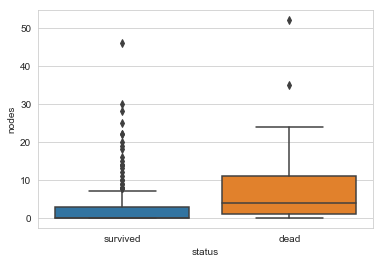

In [15]:
sns.boxplot(x="status",y="nodes",data=haberman_data)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

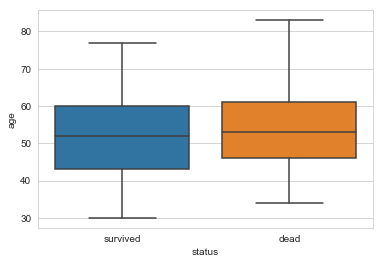

In [16]:
sns.boxplot(x="status",y="age",data=haberman_data)
plt.show

### Violin Plots

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


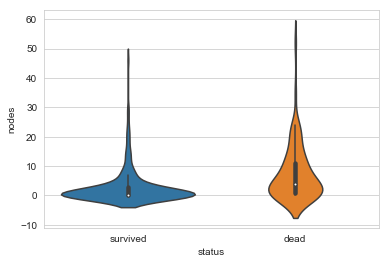

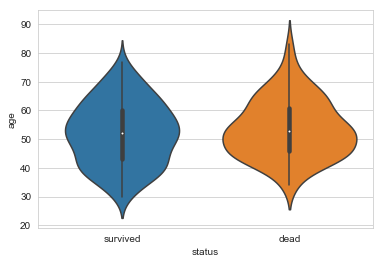

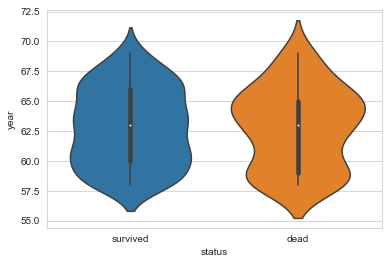

In [17]:
sns.violinplot(x="status",y="nodes",data=haberman_data,height=8)
plt.show()
sns.violinplot(x="status",y="age",data=haberman_data,height=8)
plt.show()
sns.violinplot(x="status",y="year",data=haberman_data,height=8)
plt.show()

#### Observations and conclusions: 
1. The variable "number of detected nodes" is the best one to help us separate and differentiate the two classes
2. People who survived had their ages mainly between 45 to 55 years old.

 #  -----------                            END                           -------------------